<a href="https://colab.research.google.com/github/ustab/tensorf-ml/blob/main/CCLASSPRICE_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [104]:
dataFrame = pd.read_csv("/content/cclass.csv")

In [105]:
dataFrame.head()

,model,year,price,transmission,mileage,fuelType,engineSize
0,C Class,2020,30495,Automatic,1200,Diesel,2.0
1,C Class,2020,29989,Automatic,1000,Petrol,1.5
2,C Class,2020,37899,Automatic,500,Diesel,2.0
3,C Class,2019,30399,Automatic,5000,Diesel,2.0
4,C Class,2019,29899,Automatic,4500,Diesel,2.0


In [106]:
dataFrame.describe().T

,count,mean,std,min,25%,50%,75%,max
year,3899.0,2017.338548,2.213416,1991.0,2016.0,2018.0,2019.0,2020.0
price,3899.0,23674.286997,8960.218218,1290.0,17690.0,22980.0,28900.0,88995.0
mileage,3899.0,22395.709156,22630.438426,1.0,6000.0,14640.0,32458.5,173000.0
engineSize,3899.0,2.037394,0.487769,0.0,2.0,2.0,2.1,6.2


In [107]:
dataFrame.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
engineSize      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


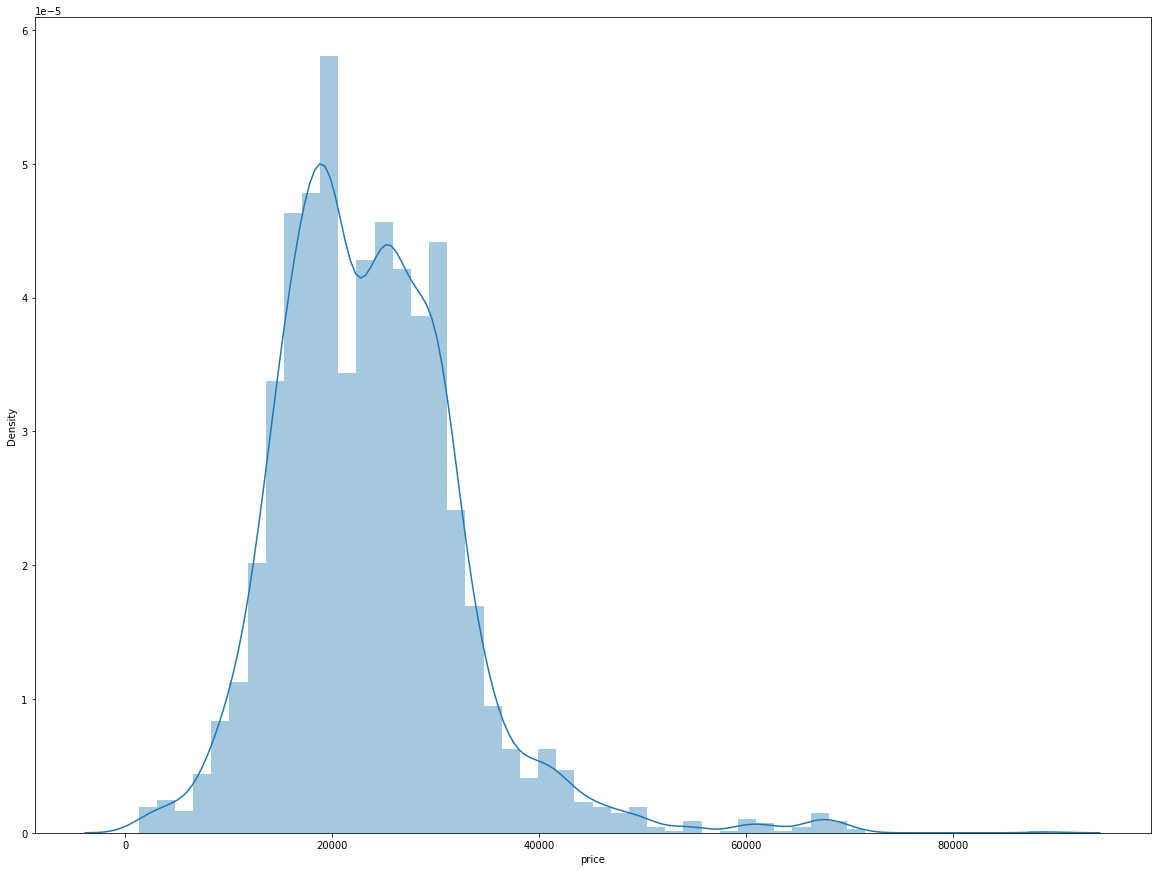

In [108]:
plt.figure(figsize=(20,15))
sbn.distplot(dataFrame["price"]);#distribusyon grafigi cizdirelim, saga dogru skreww var

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


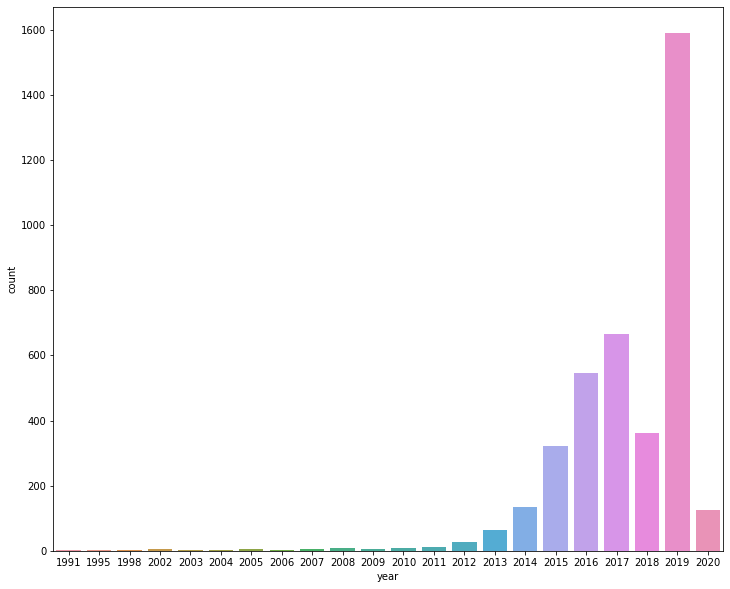

In [109]:
plt.figure(figsize=(12,10))
sbn.countplot(dataFrame["year"]);#hangi yil kac araba var

In [9]:
dataFrame.corr()#birbirleri arasinda iliski varmi

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.623756,-0.774382,0.025200,-0.071762,-0.026337
price,0.623756,1.000000,-0.605397,0.263484,-0.204882,0.460196
mileage,-0.774382,-0.605397,1.000000,-0.170747,0.118609,-0.002540
tax,0.025200,0.263484,-0.170747,1.000000,-0.351798,0.429616
mpg,-0.071762,-0.204882,0.118609,-0.351798,1.000000,-0.399844
engineSize,-0.026337,0.460196,-0.002540,0.429616,-0.399844,1.000000


In [110]:
dataFrame.corr()["price"].sort_values()# sadece fiyatlara gore siralayalim

mileage      -0.679655
engineSize    0.373798
year          0.674424
price         1.000000
Name: price, dtype: float64

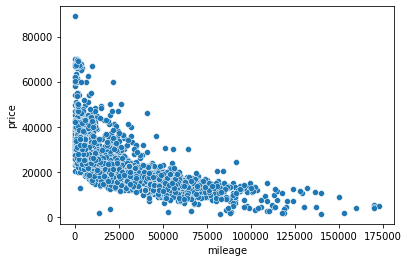

In [111]:
sbn.scatterplot(x="mileage",y="price",data=dataFrame)#mil e gore fiyat arasinda nasil bir iliski var

In [112]:
dataFrame.describe()

,year,price,mileage,engineSize
count,3899.000000,3899.000000,3899.000000,3899.000000
mean,2017.338548,23674.286997,22395.709156,2.037394
std,2.213416,8960.218218,22630.438426,0.487769
min,1991.000000,1290.000000,1.000000,0.000000
25%,2016.000000,17690.000000,6000.000000,2.000000
50%,2018.000000,22980.000000,14640.000000,2.000000
75%,2019.000000,28900.000000,32458.500000,2.100000
max,2020.000000,88995.000000,173000.000000,6.200000


In [135]:
dataFrame[dataFrame.year == 2019].sum()

model            C Class C Class C Class C Class C Class C Cla...
year                                                      3210210
price                                                    46735482
transmission    AutomaticAutomaticAutomaticAutomaticAutomaticA...
mileage                                                  11151626
fuelType        DieselDieselPetrolDieselDieselDieselDieselPetr...
engineSize                                                 3050.5
dtype: object

In [141]:
dataFrame.shape

(3899, 7)

In [140]:
dataFrame[dataFrame.year == 2019].sort_values

<bound method DataFrame.sort_values of          model  year  price transmission  mileage fuelType  engineSize
3      C Class  2019  30399    Automatic     5000   Diesel         2.0
4      C Class  2019  29899    Automatic     4500   Diesel         2.0
7      C Class  2019  37990    Automatic     1412   Petrol         3.0
8      C Class  2019  28990    Automatic     3569   Diesel         2.0
9      C Class  2019  28990    Automatic     3635   Diesel         2.0
...        ...   ...    ...          ...      ...      ...         ...
3878   C Class  2019  25995    Automatic     8999   Diesel         1.6
3884   C Class  2019  25450    Automatic    10892   Petrol         1.5
3885   C Class  2019  24995    Automatic    11664   Petrol         1.5
3886   C Class  2019  25999    Automatic    10405   Petrol         1.5
3887   C Class  2019  27999    Automatic     2000   Petrol         1.5

[1590 rows x 7 columns]>

In [113]:
dataFrame.sort_values("price",ascending = False).head(20) #cokdan aza dogru fiyatlari siralayalim

,model,year,price,transmission,mileage,fuelType,engineSize
2765,C Class,2019,88995,Semi-Auto,200,Petrol,4.0
564,C Class,2020,69995,Semi-Auto,250,Petrol,4.0
1666,C Class,2019,69950,Automatic,1079,Petrol,4.0
2664,C Class,2019,69679,Semi-Auto,1000,Petrol,4.0
2181,C Class,2019,69399,Semi-Auto,1615,Petrol,4.0
3856,C Class,2020,68995,Automatic,2000,Petrol,4.0
2386,C Class,2019,68399,Semi-Auto,1282,Petrol,4.0
325,C Class,2020,67999,Semi-Auto,1500,Petrol,4.0
818,C Class,2019,67980,Semi-Auto,3456,Petrol,4.0
1028,C Class,2019,67940,Automatic,237,Petrol,4.0


In [147]:
dataFrame.sort_values("price",ascending = False).sample(20) #cokdan aza dogru fiyatlari siralayalim

,model,year,price,transmission,mileage,fuelType,engineSize
2496,C Class,2019,40849,Semi-Auto,10387,Petrol,3.0
44,C Class,2016,13300,Manual,42622,Diesel,2.1
2935,C Class,2017,16999,Manual,12146,Diesel,1.6
3659,C Class,2018,17600,Automatic,22749,Petrol,2.0
1955,C Class,2019,28999,Semi-Auto,4606,Diesel,2.0
3207,C Class,2019,35248,Automatic,2645,Petrol,1.5
3597,C Class,2016,19995,Automatic,29000,Diesel,2.1
1412,C Class,2019,27890,Semi-Auto,8317,Diesel,2.0
984,C Class,2019,38596,Semi-Auto,2055,Petrol,3.0
1263,C Class,2016,21995,Semi-Auto,13457,Diesel,2.1


In [148]:
dataFrame.shape

(3899, 7)

In [149]:
len(dataFrame)#tane araba fiyati var

3899

In [164]:
len(dataFrame)*0.04 #tane araba fiyati var

155.96

In [168]:
yuzdeDoksanaltiDf = dataFrame.sort_values("price",ascending = False).iloc[156:]# en yuksek 131 adet fiyatli araba var, bunlar % 1 olup verimi bozmaz. burada desc siralama var ve de en yuksek olan veriden aza dogru 131 tanesini cikardik

In [169]:
yuzdeDoksanaltiDf.describe().T

,count,mean,std,min,25%,50%,75%,max
year,3743.0,2017.274379,2.229678,1991.0,2016.0,2018.0,2019.0,2020.0
price,3743.0,22591.195031,7097.878520,1290.0,17450.0,22498.0,27999.0,40000.0
mileage,3743.0,23072.241785,22806.683107,1.0,6517.5,15020.0,33095.0,173000.0
engineSize,3743.0,1.982982,0.395568,0.0,2.0,2.0,2.1,6.2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


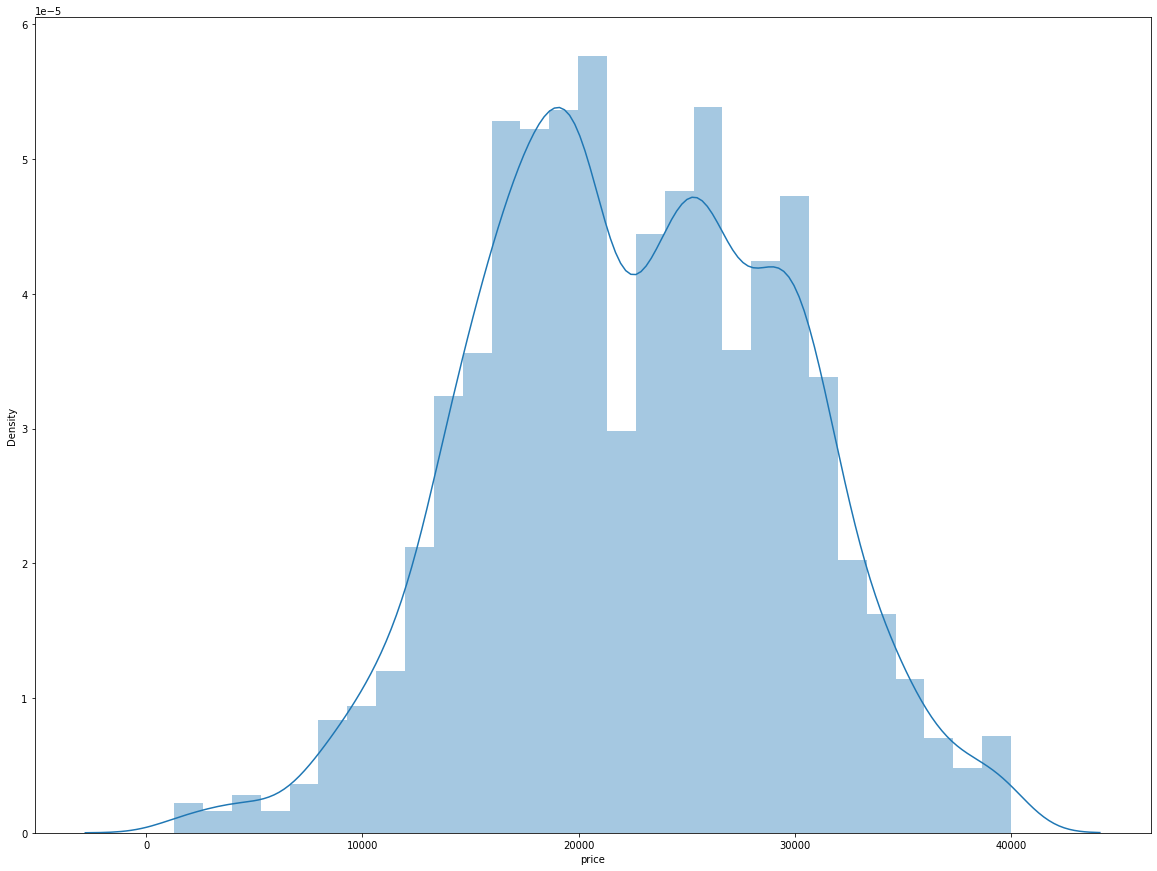

In [170]:
plt.figure(figsize=(20,15))
sbn.distplot(yuzdeDoksanaltiDf['price'])

In [24]:
dataFrame.groupby("year").mean()["price"]

year
1996     5995.000000
1997     3950.000000
1998     3950.000000
1999     3285.000000
2000     1624.500000
2001     7333.333333
2002     5486.500000
2003     9222.500000
2004     8213.166667
2005     5390.166667
2006     5252.714286
2007     4830.500000
2008     6240.043478
2009     6618.100000
2010     7490.390244
2011     9099.098039
2012     9533.689076
2013    11118.355742
2014    13323.598802
2015    15199.753796
2016    16638.403826
2017    19267.174898
2018    22721.656840
2019    31025.864275
2020    35377.680764
Name: price, dtype: float64

In [174]:
yuzdeDoksanaltiDf[dataFrame.year> 2012].groupby("year").mean()["price"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


year
2013    11083.812500
2014    14095.713235
2015    15149.741433
2016    18333.036832
2017    20718.798462
2018    23412.076271
2019    27899.675876
2020    33320.811881
Name: price, dtype: float64

In [175]:
yuzdeDoksanaltiDf.head()

,model,year,price,transmission,mileage,fuelType,engineSize
1272,C Class,2019,40000,Semi-Auto,4504,Petrol,3.0
183,C Class,2020,39998,Semi-Auto,3620,Hybrid,2.0
503,C Class,2019,39995,Semi-Auto,4604,Petrol,3.0
562,C Class,2020,39995,Semi-Auto,5000,Petrol,1.5
1461,C Class,2019,39995,Semi-Auto,3560,Petrol,3.0


In [176]:
yuzdeDoksanaltiDf.corr()

,year,price,mileage,engineSize
year,1.000000,0.766699,-0.771357,-0.299031
price,0.766699,1.000000,-0.767917,0.026903
mileage,-0.771357,-0.767917,1.000000,0.224442
engineSize,-0.299031,0.026903,0.224442,1.000000


In [177]:
yuzdeDoksanaltiDf.describe(include='all')

,model,year,price,transmission,mileage,fuelType,engineSize
count,3743,3743.000000,3743.000000,3743,3743.000000,3743,3743.000000
unique,1,NaN,NaN,4,NaN,4,NaN
top,C Class,NaN,NaN,Semi-Auto,NaN,Diesel,NaN
freq,3743,NaN,NaN,1978,NaN,2333,NaN
mean,NaN,2017.274379,22591.195031,NaN,23072.241785,NaN,1.982982
std,NaN,2.229678,7097.878520,NaN,22806.683107,NaN,0.395568
min,NaN,1991.000000,1290.000000,NaN,1.000000,NaN,0.000000
25%,NaN,2016.000000,17450.000000,NaN,6517.500000,NaN,2.000000
50%,NaN,2018.000000,22498.000000,NaN,15020.000000,NaN,2.000000
75%,NaN,2019.000000,27999.000000,NaN,33095.000000,NaN,2.100000


In [179]:
yuzdeDoksanaltiDf= dataFrame.drop(['model','transmission', 'fuelType'],axis=1)

In [180]:
yuzdeDoksanaltiDf.head(2)

,year,price,mileage,engineSize
0,2020,30495,1200,2.0
1,2020,29989,1000,1.5


In [181]:
y = yuzdeDoksanaltiDf["price"].values

In [182]:
x = yuzdeDoksanaltiDf.drop("price",axis=1).values

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [185]:
len(x_train)

2924

In [186]:
x_train

array([[2.0190e+03, 1.0340e+04, 2.0000e+00],
       [2.0160e+03, 3.9924e+04, 1.6000e+00],
       [2.0180e+03, 8.6730e+03, 2.0000e+00],
       ...,
       [2.0190e+03, 6.7800e+03, 3.0000e+00],
       [2.0170e+03, 4.0000e+04, 2.1000e+00],
       [2.0190e+03, 5.1100e+03, 2.0000e+00]])

In [187]:
len(x_test)

975

In [188]:
from sklearn.preprocessing import MinMaxScaler

In [189]:
scaler = MinMaxScaler()

In [190]:
x_train = scaler.fit_transform(x_train)

In [191]:
x_test = scaler.transform(x_test)

In [192]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [193]:
x_train.shape

(2924, 3)

In [194]:
model = Sequential()

model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [195]:
md=model.fit(x=x_train, y = y_train,validation_data=(x_test,y_test),batch_size=2000,epochs=600)

Epoch 1/600
2/2 [==============================] - 1s 143ms/step - loss: 638073856.0000 - val_loss: 648717760.0000
Epoch 2/600
2/2 [==============================] - 0s 33ms/step - loss: 638071872.0000 - val_loss: 648715968.0000
Epoch 3/600
2/2 [==============================] - 0s 30ms/step - loss: 638070272.0000 - val_loss: 648714944.0000
Epoch 4/600
2/2 [==============================] - 0s 29ms/step - loss: 638069248.0000 - val_loss: 648713984.0000
Epoch 5/600
2/2 [==============================] - 0s 25ms/step - loss: 638068224.0000 - val_loss: 648713152.0000
Epoch 6/600
2/2 [==============================] - 0s 26ms/step - loss: 638067456.0000 - val_loss: 648712384.0000
Epoch 7/600
2/2 [==============================] - 0s 27ms/step - loss: 638066624.0000 - val_loss: 648711552.0000
Epoch 8/600
2/2 [==============================] - 0s 26ms/step - loss: 638065920.0000 - val_loss: 648710720.0000
Epoch 9/600
2/2 [==============================] - 0s 26ms/step - loss: 638065024.0000 

In [199]:
val_loss = pd.DataFrame(model.history.history)

In [200]:
val_loss.head()

,loss,val_loss
0,638073856.0,648717760.0
1,638071872.0,648715968.0
2,638070272.0,648714944.0
3,638069248.0,648713984.0
4,638068224.0,648713152.0


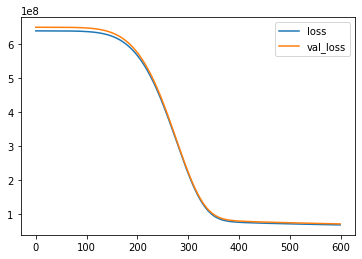

In [201]:
val_loss.plot()

In [202]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [203]:
prediction = model.predict(x_test)

In [204]:
prediction

array([[23598.361],
       [23601.559],
       [22930.46 ],
       [24234.615],
       [23182.283],
       [23281.41 ],
       [23987.416],
       [23738.008],
       [24349.5  ],
       [25763.137],
       [24086.55 ],
       [23116.984],
       [23969.19 ],
       [24188.988],
       [24238.477],
       [23274.742],
       [23964.63 ],
       [23982.377],
       [24309.996],
       [22884.121],
       [23580.74 ],
       [23301.184],
       [22593.605],
       [23412.97 ],
       [24069.318],
       [22529.793],
       [23289.066],
       [23693.777],
       [23895.434],
       [23964.365],
       [23163.918],
       [23960.266],
       [23764.38 ],
       [24010.807],
       [24052.256],
       [27353.18 ],
       [24005.725],
       [22607.975],
       [23277.934],
       [23678.492],
       [24068.969],
       [23123.385],
       [23366.627],
       [24119.46 ],
       [23665.576],
       [23748.277],
       [20269.643],
       [23828.307],
       [23866.139],
       [23912.11 ],


In [205]:
mean_squared_error(y_test,prediction)

72300750.65705

In [206]:
mean_absolute_error(y_test,prediction)

6639.484665464744

In [208]:
yuzdeDoksanaltiDf.describe()

,year,price,mileage,engineSize
count,3899.000000,3899.000000,3899.000000,3899.000000
mean,2017.338548,23674.286997,22395.709156,2.037394
std,2.213416,8960.218218,22630.438426,0.487769
min,1991.000000,1290.000000,1.000000,0.000000
25%,2016.000000,17690.000000,6000.000000,2.000000
50%,2018.000000,22980.000000,14640.000000,2.000000
75%,2019.000000,28900.000000,32458.500000,2.100000
max,2020.000000,88995.000000,173000.000000,6.200000


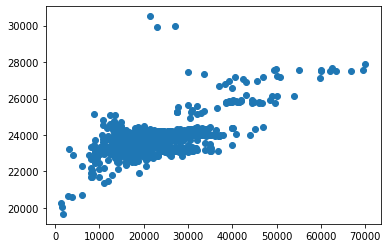

In [209]:
plt.scatter(y_test,prediction)

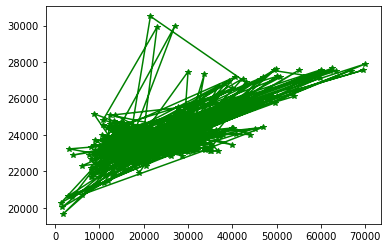

In [210]:
plt.plot(y_test,prediction,"g-*")

In [211]:
yuzdeDoksanaltiDf.shape

(3899, 4)

In [213]:
yuzdeDoksanaltiDf.iloc[2]

year           2020.0
price         37899.0
mileage         500.0
engineSize        2.0
Name: 2, dtype: float64

ORNEK UYGULAMA

In [214]:
yuzdeDoksanaltiDf.head()

,year,price,mileage,engineSize
0,2020,30495,1200,2.0
1,2020,29989,1000,1.5
2,2020,37899,500,2.0
3,2019,30399,5000,2.0
4,2019,29899,4500,2.0


In [215]:
yeniArabaSeries = yuzdeDoksanaltiDf.drop("price",axis=1).iloc[2]

In [216]:
type(yeniArabaSeries)

pandas.core.series.Series

In [218]:
yeniArabaSeries = scaler.fit_transform(yeniArabaSeries.values.reshape(-1,3))

In [219]:
model.predict(yeniArabaSeries)

array([[9995.382]], dtype=float32)